#### Problem Statement
To predict the salary of an employee or a person using ML with his experience, the test score and the interview score

#### Dataset
The dataset used here is own dataset

In [ ]:
import pandas as pd
df = pd.read_csv("/content/hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
df.isnull()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,True,False,False,False
1,True,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False


In [ ]:
medianvalue = df['test_score(out of 10)'].median()

In [ ]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(medianvalue)

In [ ]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [ ]:
df['experience'] = df['experience'].fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [ ]:
!pip install word2number

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=e22c7d54a068b2cc77341f8d413efd73afbed3ab3f48205fb76b53498af9476f
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number


In [ ]:
from word2number import w2n
#example
w2n.word_to_num("ten")

10

In [ ]:
#Applying Lambda Function
#When we want to apply some operations on all data of a column, use apply() function

In [ ]:
def convertw2n(x):
  return w2n.word_to_num(x)

In [ ]:
df['experience'] = df['experience'].apply(convertw2n)
#Another method
#df['experience'] = df['experience'].apply(lambda x: w2n.word_to_num(x))

In [ ]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


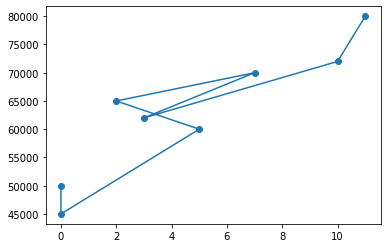

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df['experience'],df['salary($)'])
plt.plot(df['experience'],df['salary($)'])

In [23]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x = df.drop('salary($)', axis = 1)
x

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,8.0,7
7,11,7.0,8


In [24]:
y = df['salary($)']
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [29]:
reg.fit(x,y)
import warnings
warnings.filterwarnings("ignore")

In [30]:
reg.predict([[0,5,5]])

array([37991.99417758])

In [33]:
reg.score(x,y)

0.9616780002577959

In [34]:
reg.intercept_

17737.263464337688

In [35]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [36]:
import pickle
with open('salarymodel','wb') as f:
  pickle.dump(reg,f)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7b8d9943-677a-4f6c-bc23-db8736c52eff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>